## Learning ref DQNs on all 104 tasks 

In [4]:
from deep_rl import *
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import trange, tqdm
import random
import numpy as np
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def dqn_feature(**kwargs):
    generate_tag(kwargs)
    kwargs.setdefault('log_level', 0)
    config = Config()
    config.merge(kwargs)

    config.task_fn = lambda: Task(config.game)
    config.eval_env = config.task_fn()

    config.optimizer_fn = lambda params: torch.optim.RMSprop(params, 0.001)
    config.network_fn = lambda: VanillaNet(config.action_dim, FCBody(config.state_dim, hidden_units=(416,)))
    # config.network_fn = lambda: DuelingNet(config.action_dim, FCBody(config.state_dim))
    # config.replay_fn = lambda: Replay(memory_size=int(1e4), batch_size=10)
    config.replay_fn = lambda: AsyncReplay(memory_size=int(1e4), batch_size=10)

    config.random_action_prob = LinearSchedule(1.0, 0.1, 1e4)
    config.discount = 0.99
    config.target_network_update_freq = 200
    config.exploration_steps = 0
    # config.double_q = True
    config.double_q = False
    config.sgd_update_frequency = 4
    config.gradient_clip = 5
    config.eval_interval = int(5e3)
    config.max_steps = 5e4
    config.async_actor = False
    agent = DQNAgent(config)
    #run_steps function below
    config = agent.config
    agent_name = agent.__class__.__name__
    t0 = time.time()
    while True:
        if config.save_interval and not agent.total_steps % config.save_interval:
            agent.save('data/%s-%s-%d' % (agent_name, config.tag, agent.total_steps))
        if config.log_interval and not agent.total_steps % config.log_interval:
            t0 = time.time()
        if config.eval_interval and not agent.total_steps % config.eval_interval:
            agent.eval_episodes()
            pass
        if config.max_steps and agent.total_steps >= config.max_steps:
            return agent
            break
        agent.step()
        agent.switch_task()
    return agent

2020-05-02 16:08:18,514 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:08:23,621 - root - INFO: steps 5000, episodic_return_test -120.90(30.64)
2020-05-02 16:08:29,867 - root - INFO: steps 10000, episodic_return_test -64.70(28.02)
2020-05-02 16:08:34,607 - root - INFO: steps 15000, episodic_return_test -5.90(1.28)
2020-05-02 16:08:40,380 - root - INFO: steps 20000, episodic_return_test -4.70(0.75)
2020-05-02 16:08:46,727 - root - INFO: steps 25000, episodic_return_test -7.10(1.29)
2020-05-02 16:08:52,862 - root - INFO: steps 30000, episodic_return_test -6.70(1.27)
2020-05-02 16:08:59,442 - root - INFO: steps 35000, episodic_return_test -7.80(1.06)
2020-05-02 16:09:06,712 - root - INFO: steps 40000, episodic_return_test -5.70(1.26)
2020-05-02 16:09:15,264 - root - INFO: steps 45000, episodic_return_test -6.50(1.37)
2020-05-02 16:09:23,914 - root - INFO: steps 50000, episodic_return_test -6.50(1.42)


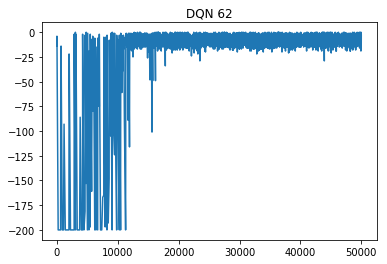

2020-05-02 16:09:25,036 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:09:32,972 - root - INFO: steps 5000, episodic_return_test -120.90(30.64)
2020-05-02 16:09:40,355 - root - INFO: steps 10000, episodic_return_test -160.60(24.92)
2020-05-02 16:09:48,662 - root - INFO: steps 15000, episodic_return_test -160.40(25.05)
2020-05-02 16:09:55,077 - root - INFO: steps 20000, episodic_return_test -47.60(24.11)
2020-05-02 16:10:01,724 - root - INFO: steps 25000, episodic_return_test -46.10(24.36)
2020-05-02 16:10:08,463 - root - INFO: steps 30000, episodic_return_test -8.60(1.33)
2020-05-02 16:10:16,264 - root - INFO: steps 35000, episodic_return_test -9.00(1.35)
2020-05-02 16:10:23,841 - root - INFO: steps 40000, episodic_return_test -9.80(1.32)
2020-05-02 16:10:31,397 - root - INFO: steps 45000, episodic_return_test -6.60(1.59)
2020-05-02 16:10:40,881 - root - INFO: steps 50000, episodic_return_test -8.60(1.26)


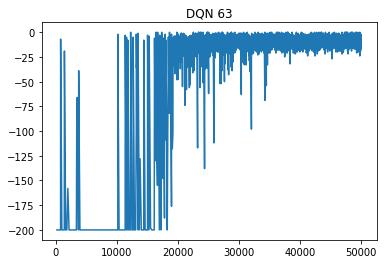

2020-05-02 16:10:42,419 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:10:51,413 - root - INFO: steps 5000, episodic_return_test -141.20(28.41)
2020-05-02 16:10:59,502 - root - INFO: steps 10000, episodic_return_test -104.20(30.30)
2020-05-02 16:11:08,478 - root - INFO: steps 15000, episodic_return_test -25.50(18.44)
2020-05-02 16:11:14,568 - root - INFO: steps 20000, episodic_return_test -7.90(1.01)
2020-05-02 16:11:20,350 - root - INFO: steps 25000, episodic_return_test -6.50(1.35)
2020-05-02 16:11:26,560 - root - INFO: steps 30000, episodic_return_test -5.90(1.36)
2020-05-02 16:11:32,295 - root - INFO: steps 35000, episodic_return_test -7.70(1.41)
2020-05-02 16:11:38,433 - root - INFO: steps 40000, episodic_return_test -7.60(1.36)
2020-05-02 16:11:44,735 - root - INFO: steps 45000, episodic_return_test -5.90(1.45)
2020-05-02 16:11:50,720 - root - INFO: steps 50000, episodic_return_test -6.00(1.28)


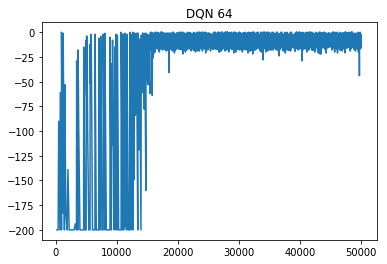

2020-05-02 16:11:51,854 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:11:58,928 - root - INFO: steps 5000, episodic_return_test -140.40(28.79)
2020-05-02 16:12:05,568 - root - INFO: steps 10000, episodic_return_test -141.00(28.50)
2020-05-02 16:12:14,035 - root - INFO: steps 15000, episodic_return_test -65.10(27.93)
2020-05-02 16:12:19,704 - root - INFO: steps 20000, episodic_return_test -3.10(0.93)
2020-05-02 16:12:41,936 - root - INFO: steps 25000, episodic_return_test -9.20(1.00)
2020-05-02 16:12:49,906 - root - INFO: steps 30000, episodic_return_test -26.30(18.37)
2020-05-02 16:12:57,980 - root - INFO: steps 35000, episodic_return_test -7.90(1.24)
2020-05-02 16:13:06,361 - root - INFO: steps 40000, episodic_return_test -5.90(1.38)
2020-05-02 16:13:14,298 - root - INFO: steps 45000, episodic_return_test -8.90(1.51)
2020-05-02 16:13:22,788 - root - INFO: steps 50000, episodic_return_test -6.40(1.03)


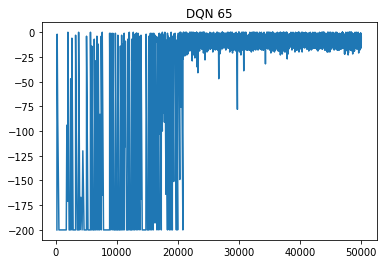

2020-05-02 16:13:24,180 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:13:33,287 - root - INFO: steps 5000, episodic_return_test -160.70(24.86)
2020-05-02 16:13:40,889 - root - INFO: steps 10000, episodic_return_test -83.80(30.02)
2020-05-02 16:13:49,371 - root - INFO: steps 15000, episodic_return_test -101.80(31.06)
2020-05-02 16:14:04,087 - root - INFO: steps 20000, episodic_return_test -45.80(24.41)
2020-05-02 16:14:22,918 - root - INFO: steps 25000, episodic_return_test -9.10(1.51)
2020-05-02 16:14:31,597 - root - INFO: steps 30000, episodic_return_test -7.20(1.41)
2020-05-02 16:14:37,714 - root - INFO: steps 35000, episodic_return_test -10.10(0.96)
2020-05-02 16:14:43,620 - root - INFO: steps 40000, episodic_return_test -7.60(1.29)
2020-05-02 16:14:51,693 - root - INFO: steps 45000, episodic_return_test -8.60(1.38)
2020-05-02 16:15:01,265 - root - INFO: steps 50000, episodic_return_test -6.50(1.39)


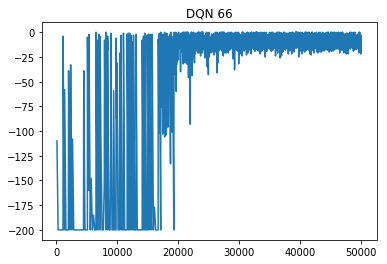

2020-05-02 16:15:02,570 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:15:10,712 - root - INFO: steps 5000, episodic_return_test -161.10(24.60)
2020-05-02 16:15:18,560 - root - INFO: steps 10000, episodic_return_test -42.80(24.86)
2020-05-02 16:15:25,095 - root - INFO: steps 15000, episodic_return_test -62.60(28.45)
2020-05-02 16:15:31,472 - root - INFO: steps 20000, episodic_return_test -9.60(1.17)
2020-05-02 16:15:37,764 - root - INFO: steps 25000, episodic_return_test -9.00(1.03)
2020-05-02 16:15:47,718 - root - INFO: steps 30000, episodic_return_test -7.50(1.29)
2020-05-02 16:15:55,514 - root - INFO: steps 35000, episodic_return_test -6.90(0.82)
2020-05-02 16:16:05,562 - root - INFO: steps 40000, episodic_return_test -10.10(1.16)
2020-05-02 16:16:14,701 - root - INFO: steps 45000, episodic_return_test -7.80(1.11)
2020-05-02 16:16:22,758 - root - INFO: steps 50000, episodic_return_test -7.60(1.17)


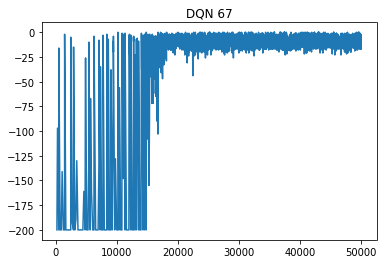

2020-05-02 16:16:23,752 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:16:32,300 - root - INFO: steps 5000, episodic_return_test -141.10(28.45)
2020-05-02 16:16:38,329 - root - INFO: steps 10000, episodic_return_test -83.30(30.14)
2020-05-02 16:16:44,889 - root - INFO: steps 15000, episodic_return_test -84.30(29.88)
2020-05-02 16:16:51,649 - root - INFO: steps 20000, episodic_return_test -47.50(24.12)
2020-05-02 16:16:59,300 - root - INFO: steps 25000, episodic_return_test -7.50(1.47)
2020-05-02 16:17:05,893 - root - INFO: steps 30000, episodic_return_test -8.30(1.08)
2020-05-02 16:17:13,784 - root - INFO: steps 35000, episodic_return_test -8.40(0.95)
2020-05-02 16:17:20,469 - root - INFO: steps 40000, episodic_return_test -8.50(1.24)
2020-05-02 16:17:28,399 - root - INFO: steps 45000, episodic_return_test -6.20(1.20)
2020-05-02 16:17:34,743 - root - INFO: steps 50000, episodic_return_test -7.50(0.85)


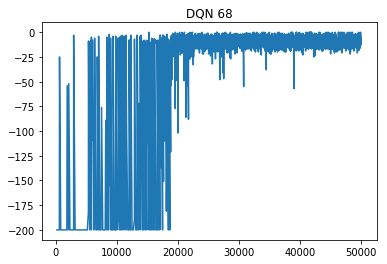

2020-05-02 16:17:35,824 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:17:43,689 - root - INFO: steps 5000, episodic_return_test -200.00(0.00)
2020-05-02 16:17:49,463 - root - INFO: steps 10000, episodic_return_test -24.70(18.49)
2020-05-02 16:17:55,145 - root - INFO: steps 15000, episodic_return_test -7.20(1.15)
2020-05-02 16:18:04,562 - root - INFO: steps 20000, episodic_return_test -5.40(0.76)
2020-05-02 16:18:12,728 - root - INFO: steps 25000, episodic_return_test -7.40(1.22)
2020-05-02 16:18:19,801 - root - INFO: steps 30000, episodic_return_test -8.30(1.07)
2020-05-02 16:18:27,153 - root - INFO: steps 35000, episodic_return_test -7.00(1.03)
2020-05-02 16:18:34,906 - root - INFO: steps 40000, episodic_return_test -5.80(1.30)
2020-05-02 16:18:41,721 - root - INFO: steps 45000, episodic_return_test -8.20(1.32)
2020-05-02 16:18:50,757 - root - INFO: steps 50000, episodic_return_test -6.60(1.26)


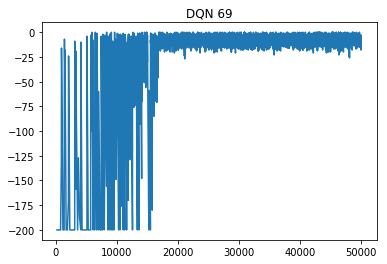

2020-05-02 16:18:52,035 - root - INFO: steps 0, episodic_return_test -180.00(18.97)
2020-05-02 16:19:02,025 - root - INFO: steps 5000, episodic_return_test -161.20(24.54)
2020-05-02 16:19:18,942 - root - INFO: steps 10000, episodic_return_test -82.70(30.29)
2020-05-02 16:19:26,845 - root - INFO: steps 15000, episodic_return_test -6.00(0.81)
2020-05-02 16:19:34,517 - root - INFO: steps 20000, episodic_return_test -8.20(1.40)
2020-05-02 16:19:41,629 - root - INFO: steps 25000, episodic_return_test -6.80(1.11)
2020-05-02 16:19:48,675 - root - INFO: steps 30000, episodic_return_test -5.10(0.77)
2020-05-02 16:19:56,064 - root - INFO: steps 35000, episodic_return_test -8.40(0.68)
2020-05-02 16:20:04,170 - root - INFO: steps 40000, episodic_return_test -5.00(1.08)
2020-05-02 16:20:11,986 - root - INFO: steps 45000, episodic_return_test -5.60(1.22)
2020-05-02 16:20:19,155 - root - INFO: steps 50000, episodic_return_test -7.20(1.22)


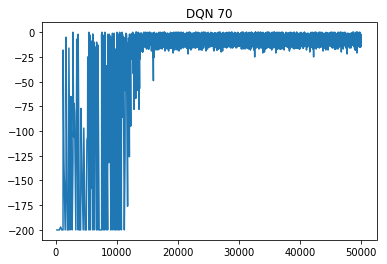

2020-05-02 16:20:20,305 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:20:28,850 - root - INFO: steps 5000, episodic_return_test -180.20(18.78)
2020-05-02 16:20:35,837 - root - INFO: steps 10000, episodic_return_test -103.80(30.43)
2020-05-02 16:20:42,211 - root - INFO: steps 15000, episodic_return_test -44.90(24.55)
2020-05-02 16:20:48,267 - root - INFO: steps 20000, episodic_return_test -6.40(1.47)
2020-05-02 16:20:55,636 - root - INFO: steps 25000, episodic_return_test -7.60(0.84)
2020-05-02 16:21:03,018 - root - INFO: steps 30000, episodic_return_test -7.90(1.58)
2020-05-02 16:21:11,769 - root - INFO: steps 35000, episodic_return_test -6.50(1.01)
2020-05-02 16:21:19,133 - root - INFO: steps 40000, episodic_return_test -6.90(0.98)
2020-05-02 16:21:26,007 - root - INFO: steps 45000, episodic_return_test -5.00(1.21)
2020-05-02 16:21:32,993 - root - INFO: steps 50000, episodic_return_test -6.90(1.18)


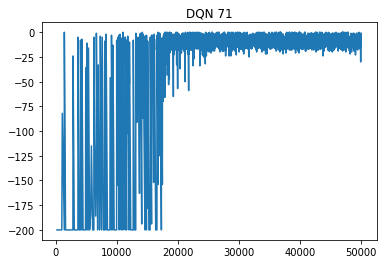

2020-05-02 16:21:34,127 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:21:42,394 - root - INFO: steps 5000, episodic_return_test -200.00(0.00)
2020-05-02 16:21:49,532 - root - INFO: steps 10000, episodic_return_test -82.50(30.35)
2020-05-02 16:21:56,727 - root - INFO: steps 15000, episodic_return_test -46.30(24.31)
2020-05-02 16:22:03,862 - root - INFO: steps 20000, episodic_return_test -8.50(1.46)
2020-05-02 16:22:11,668 - root - INFO: steps 25000, episodic_return_test -46.50(24.30)
2020-05-02 16:22:20,261 - root - INFO: steps 30000, episodic_return_test -10.00(1.01)
2020-05-02 16:22:27,386 - root - INFO: steps 35000, episodic_return_test -9.20(0.82)
2020-05-02 16:22:35,863 - root - INFO: steps 40000, episodic_return_test -9.20(1.32)
2020-05-02 16:22:44,118 - root - INFO: steps 45000, episodic_return_test -7.60(1.39)
2020-05-02 16:22:52,401 - root - INFO: steps 50000, episodic_return_test -6.70(0.95)


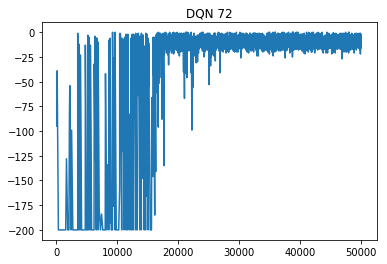

2020-05-02 16:22:53,544 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:23:02,050 - root - INFO: steps 5000, episodic_return_test -180.20(18.78)
2020-05-02 16:23:11,919 - root - INFO: steps 10000, episodic_return_test -82.40(30.37)
2020-05-02 16:23:21,385 - root - INFO: steps 15000, episodic_return_test -160.90(24.73)
2020-05-02 16:23:31,896 - root - INFO: steps 20000, episodic_return_test -84.20(29.91)
2020-05-02 16:23:46,867 - root - INFO: steps 25000, episodic_return_test -9.40(1.50)
2020-05-02 16:23:55,297 - root - INFO: steps 30000, episodic_return_test -7.90(1.55)
2020-05-02 16:24:04,459 - root - INFO: steps 35000, episodic_return_test -27.60(18.22)
2020-05-02 16:24:13,799 - root - INFO: steps 40000, episodic_return_test -7.30(1.10)
2020-05-02 16:24:22,804 - root - INFO: steps 45000, episodic_return_test -8.40(1.98)
2020-05-02 16:24:34,765 - root - INFO: steps 50000, episodic_return_test -6.50(1.52)


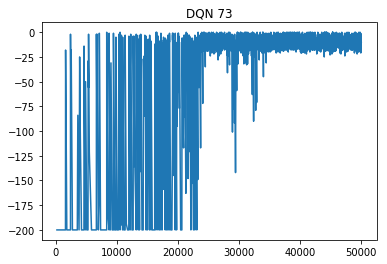

2020-05-02 16:24:36,344 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:24:45,463 - root - INFO: steps 5000, episodic_return_test -140.60(28.69)
2020-05-02 16:24:52,741 - root - INFO: steps 10000, episodic_return_test -83.50(30.09)
2020-05-02 16:25:01,195 - root - INFO: steps 15000, episodic_return_test -85.80(29.49)
2020-05-02 16:25:10,782 - root - INFO: steps 20000, episodic_return_test -6.40(1.37)
2020-05-02 16:25:18,695 - root - INFO: steps 25000, episodic_return_test -7.10(1.07)
2020-05-02 16:25:25,222 - root - INFO: steps 30000, episodic_return_test -8.50(1.43)
2020-05-02 16:25:32,038 - root - INFO: steps 35000, episodic_return_test -8.40(1.01)
2020-05-02 16:25:38,661 - root - INFO: steps 40000, episodic_return_test -7.80(1.28)
2020-05-02 16:25:47,317 - root - INFO: steps 45000, episodic_return_test -8.00(1.13)
2020-05-02 16:25:54,739 - root - INFO: steps 50000, episodic_return_test -3.70(0.80)


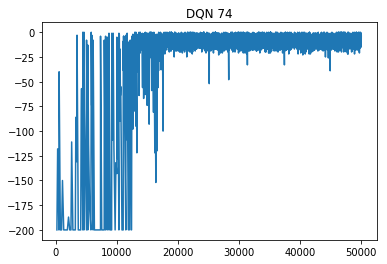

2020-05-02 16:25:55,724 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:26:03,866 - root - INFO: steps 5000, episodic_return_test -160.60(24.92)
2020-05-02 16:26:12,645 - root - INFO: steps 10000, episodic_return_test -120.80(30.68)
2020-05-02 16:26:18,308 - root - INFO: steps 15000, episodic_return_test -42.90(24.85)
2020-05-02 16:26:26,279 - root - INFO: steps 20000, episodic_return_test -11.30(0.91)
2020-05-02 16:26:33,636 - root - INFO: steps 25000, episodic_return_test -10.90(1.11)
2020-05-02 16:26:39,732 - root - INFO: steps 30000, episodic_return_test -7.20(1.06)
2020-05-02 16:26:45,551 - root - INFO: steps 35000, episodic_return_test -8.80(1.52)
2020-05-02 16:26:52,124 - root - INFO: steps 40000, episodic_return_test -7.30(0.79)
2020-05-02 16:27:00,847 - root - INFO: steps 45000, episodic_return_test -7.40(1.18)
2020-05-02 16:27:08,352 - root - INFO: steps 50000, episodic_return_test -6.70(1.50)


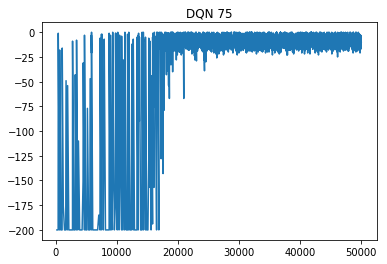

2020-05-02 16:27:09,389 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:27:17,603 - root - INFO: steps 5000, episodic_return_test -200.00(0.00)
2020-05-02 16:27:23,925 - root - INFO: steps 10000, episodic_return_test -101.30(31.22)
2020-05-02 16:27:30,230 - root - INFO: steps 15000, episodic_return_test -9.10(1.41)
2020-05-02 16:27:36,823 - root - INFO: steps 20000, episodic_return_test -7.10(1.37)
2020-05-02 16:27:42,911 - root - INFO: steps 25000, episodic_return_test -9.00(1.29)
2020-05-02 16:27:51,491 - root - INFO: steps 30000, episodic_return_test -11.20(0.91)
2020-05-02 16:28:01,319 - root - INFO: steps 35000, episodic_return_test -7.40(1.44)
2020-05-02 16:28:10,324 - root - INFO: steps 40000, episodic_return_test -8.10(1.62)
2020-05-02 16:28:18,679 - root - INFO: steps 45000, episodic_return_test -9.20(1.24)
2020-05-02 16:28:27,567 - root - INFO: steps 50000, episodic_return_test -7.90(1.52)


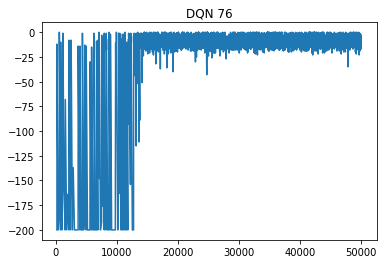

2020-05-02 16:28:28,783 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:28:37,163 - root - INFO: steps 5000, episodic_return_test -180.30(18.69)
2020-05-02 16:28:44,800 - root - INFO: steps 10000, episodic_return_test -43.50(24.75)
2020-05-02 16:28:51,482 - root - INFO: steps 15000, episodic_return_test -9.50(1.35)
2020-05-02 16:28:58,999 - root - INFO: steps 20000, episodic_return_test -9.70(1.10)
2020-05-02 16:29:07,287 - root - INFO: steps 25000, episodic_return_test -4.90(1.14)
2020-05-02 16:29:15,279 - root - INFO: steps 30000, episodic_return_test -7.80(1.45)
2020-05-02 16:29:23,726 - root - INFO: steps 35000, episodic_return_test -5.70(1.41)
2020-05-02 16:29:31,702 - root - INFO: steps 40000, episodic_return_test -9.10(1.37)
2020-05-02 16:29:40,403 - root - INFO: steps 45000, episodic_return_test -6.10(1.14)
2020-05-02 16:29:47,474 - root - INFO: steps 50000, episodic_return_test -9.30(1.48)


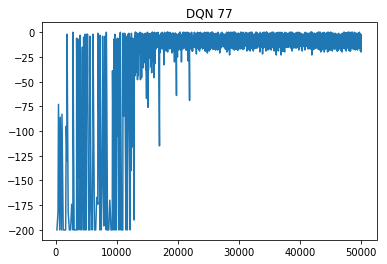

2020-05-02 16:29:48,635 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:29:56,141 - root - INFO: steps 5000, episodic_return_test -140.90(28.55)
2020-05-02 16:30:04,523 - root - INFO: steps 10000, episodic_return_test -43.00(24.83)
2020-05-02 16:30:10,613 - root - INFO: steps 15000, episodic_return_test -65.40(27.89)
2020-05-02 16:30:18,446 - root - INFO: steps 20000, episodic_return_test -8.20(1.21)
2020-05-02 16:30:25,583 - root - INFO: steps 25000, episodic_return_test -7.30(1.18)
2020-05-02 16:30:33,864 - root - INFO: steps 30000, episodic_return_test -6.40(1.17)
2020-05-02 16:30:40,850 - root - INFO: steps 35000, episodic_return_test -5.70(1.28)
2020-05-02 16:30:48,831 - root - INFO: steps 40000, episodic_return_test -7.80(1.10)
2020-05-02 16:30:57,047 - root - INFO: steps 45000, episodic_return_test -7.90(1.34)
2020-05-02 16:31:05,888 - root - INFO: steps 50000, episodic_return_test -6.90(1.18)


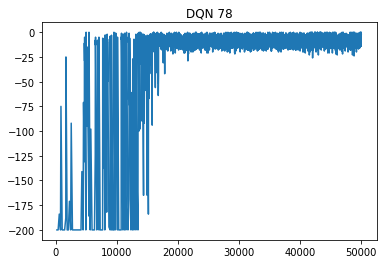

2020-05-02 16:31:07,251 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:31:16,321 - root - INFO: steps 5000, episodic_return_test -180.10(18.88)
2020-05-02 16:31:25,225 - root - INFO: steps 10000, episodic_return_test -82.20(30.43)
2020-05-02 16:31:31,935 - root - INFO: steps 15000, episodic_return_test -44.10(24.66)
2020-05-02 16:31:41,475 - root - INFO: steps 20000, episodic_return_test -6.50(1.18)
2020-05-02 16:31:49,810 - root - INFO: steps 25000, episodic_return_test -6.20(0.81)
2020-05-02 16:31:56,142 - root - INFO: steps 30000, episodic_return_test -8.20(1.40)
2020-05-02 16:32:02,731 - root - INFO: steps 35000, episodic_return_test -9.20(0.87)
2020-05-02 16:32:10,568 - root - INFO: steps 40000, episodic_return_test -8.60(1.29)
2020-05-02 16:32:18,882 - root - INFO: steps 45000, episodic_return_test -6.40(0.59)
2020-05-02 16:32:27,498 - root - INFO: steps 50000, episodic_return_test -6.50(1.00)


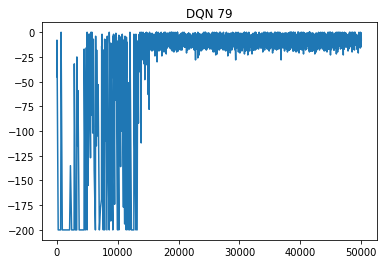

2020-05-02 16:32:28,801 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:32:36,607 - root - INFO: steps 5000, episodic_return_test -160.30(25.11)
2020-05-02 16:32:43,044 - root - INFO: steps 10000, episodic_return_test -141.10(28.45)
2020-05-02 16:32:52,564 - root - INFO: steps 15000, episodic_return_test -44.00(24.68)
2020-05-02 16:33:12,123 - root - INFO: steps 20000, episodic_return_test -6.20(1.17)
2020-05-02 16:33:20,596 - root - INFO: steps 25000, episodic_return_test -8.10(0.99)
2020-05-02 16:33:28,488 - root - INFO: steps 30000, episodic_return_test -10.50(1.15)
2020-05-02 16:33:36,727 - root - INFO: steps 35000, episodic_return_test -6.00(1.01)
2020-05-02 16:33:44,682 - root - INFO: steps 40000, episodic_return_test -6.30(1.08)
2020-05-02 16:33:53,114 - root - INFO: steps 45000, episodic_return_test -5.20(1.16)
2020-05-02 16:34:00,551 - root - INFO: steps 50000, episodic_return_test -7.30(1.60)


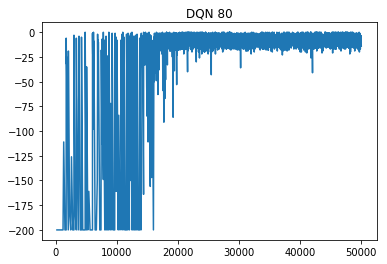

2020-05-02 16:34:01,673 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:34:08,805 - root - INFO: steps 5000, episodic_return_test -160.60(24.92)
2020-05-02 16:34:14,960 - root - INFO: steps 10000, episodic_return_test -83.90(29.98)
2020-05-02 16:34:20,977 - root - INFO: steps 15000, episodic_return_test -102.10(30.97)
2020-05-02 16:34:26,871 - root - INFO: steps 20000, episodic_return_test -81.90(30.50)
2020-05-02 16:34:32,560 - root - INFO: steps 25000, episodic_return_test -7.70(0.97)
2020-05-02 16:34:38,296 - root - INFO: steps 30000, episodic_return_test -7.80(1.12)
2020-05-02 16:34:44,132 - root - INFO: steps 35000, episodic_return_test -9.10(1.62)
2020-05-02 16:34:50,112 - root - INFO: steps 40000, episodic_return_test -6.60(1.06)
2020-05-02 16:34:56,375 - root - INFO: steps 45000, episodic_return_test -7.90(1.40)
2020-05-02 16:35:02,870 - root - INFO: steps 50000, episodic_return_test -8.20(0.82)


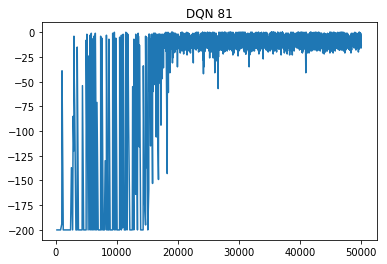

2020-05-02 16:35:03,941 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:35:11,112 - root - INFO: steps 5000, episodic_return_test -200.00(0.00)
2020-05-02 16:35:17,180 - root - INFO: steps 10000, episodic_return_test -101.00(31.31)
2020-05-02 16:35:23,260 - root - INFO: steps 15000, episodic_return_test -45.80(24.39)
2020-05-02 16:35:29,329 - root - INFO: steps 20000, episodic_return_test -9.60(1.47)
2020-05-02 16:35:35,222 - root - INFO: steps 25000, episodic_return_test -12.40(0.76)
2020-05-02 16:35:41,306 - root - INFO: steps 30000, episodic_return_test -8.00(0.69)
2020-05-02 16:35:47,134 - root - INFO: steps 35000, episodic_return_test -5.60(1.36)
2020-05-02 16:35:53,168 - root - INFO: steps 40000, episodic_return_test -10.50(1.02)
2020-05-02 16:35:59,360 - root - INFO: steps 45000, episodic_return_test -6.80(1.21)
2020-05-02 16:36:05,788 - root - INFO: steps 50000, episodic_return_test -7.00(0.86)


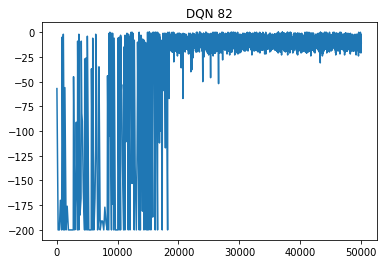

2020-05-02 16:36:06,715 - root - INFO: steps 0, episodic_return_test -180.10(18.88)
2020-05-02 16:36:13,518 - root - INFO: steps 5000, episodic_return_test -200.00(0.00)
2020-05-02 16:36:22,430 - root - INFO: steps 10000, episodic_return_test -102.90(30.71)
2020-05-02 16:36:28,945 - root - INFO: steps 15000, episodic_return_test -45.80(24.40)
2020-05-02 16:36:35,603 - root - INFO: steps 20000, episodic_return_test -27.80(18.23)
2020-05-02 16:36:41,738 - root - INFO: steps 25000, episodic_return_test -8.20(1.26)
2020-05-02 16:36:47,685 - root - INFO: steps 30000, episodic_return_test -28.50(18.13)
2020-05-02 16:36:53,595 - root - INFO: steps 35000, episodic_return_test -7.70(1.38)
2020-05-02 16:36:59,561 - root - INFO: steps 40000, episodic_return_test -9.50(1.34)
2020-05-02 16:37:05,893 - root - INFO: steps 45000, episodic_return_test -9.10(1.49)
2020-05-02 16:37:12,146 - root - INFO: steps 50000, episodic_return_test -5.10(1.11)


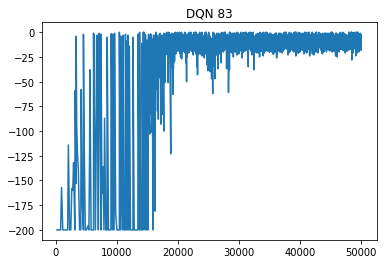

2020-05-02 16:37:13,148 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:37:20,279 - root - INFO: steps 5000, episodic_return_test -102.00(30.99)
2020-05-02 16:37:27,258 - root - INFO: steps 10000, episodic_return_test -44.80(24.57)
2020-05-02 16:37:33,260 - root - INFO: steps 15000, episodic_return_test -7.60(1.51)
2020-05-02 16:37:39,151 - root - INFO: steps 20000, episodic_return_test -8.60(1.24)
2020-05-02 16:37:44,871 - root - INFO: steps 25000, episodic_return_test -8.00(1.23)
2020-05-02 16:37:50,598 - root - INFO: steps 30000, episodic_return_test -6.10(1.00)
2020-05-02 16:37:56,668 - root - INFO: steps 35000, episodic_return_test -5.70(1.21)
2020-05-02 16:38:02,870 - root - INFO: steps 40000, episodic_return_test -7.60(1.44)
2020-05-02 16:38:09,121 - root - INFO: steps 45000, episodic_return_test -6.40(1.56)
2020-05-02 16:38:16,265 - root - INFO: steps 50000, episodic_return_test -10.70(1.18)


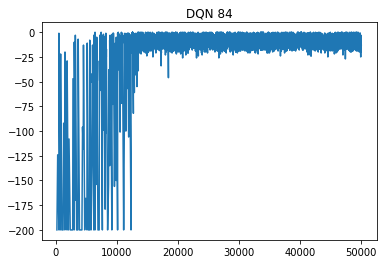

2020-05-02 16:38:17,293 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:38:24,637 - root - INFO: steps 5000, episodic_return_test -200.00(0.00)
2020-05-02 16:38:31,263 - root - INFO: steps 10000, episodic_return_test -103.20(30.61)
2020-05-02 16:38:37,436 - root - INFO: steps 15000, episodic_return_test -84.00(29.96)
2020-05-02 16:38:43,178 - root - INFO: steps 20000, episodic_return_test -27.00(18.29)
2020-05-02 16:38:49,266 - root - INFO: steps 25000, episodic_return_test -25.20(18.46)
2020-05-02 16:38:54,993 - root - INFO: steps 30000, episodic_return_test -4.60(1.10)
2020-05-02 16:39:00,916 - root - INFO: steps 35000, episodic_return_test -8.60(1.37)
2020-05-02 16:39:06,913 - root - INFO: steps 40000, episodic_return_test -6.10(1.74)
2020-05-02 16:39:13,154 - root - INFO: steps 45000, episodic_return_test -7.40(1.11)
2020-05-02 16:39:19,556 - root - INFO: steps 50000, episodic_return_test -5.90(1.32)


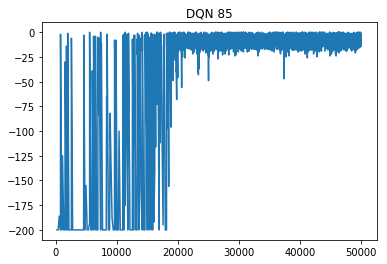

2020-05-02 16:39:20,582 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:39:27,428 - root - INFO: steps 5000, episodic_return_test -200.00(0.00)
2020-05-02 16:39:33,341 - root - INFO: steps 10000, episodic_return_test -82.20(30.42)
2020-05-02 16:39:39,114 - root - INFO: steps 15000, episodic_return_test -46.20(24.34)
2020-05-02 16:39:44,867 - root - INFO: steps 20000, episodic_return_test -7.00(0.94)
2020-05-02 16:39:50,622 - root - INFO: steps 25000, episodic_return_test -6.00(1.56)
2020-05-02 16:39:56,380 - root - INFO: steps 30000, episodic_return_test -6.80(1.08)
2020-05-02 16:40:02,530 - root - INFO: steps 35000, episodic_return_test -7.40(1.15)
2020-05-02 16:40:08,743 - root - INFO: steps 40000, episodic_return_test -8.60(1.46)
2020-05-02 16:40:15,219 - root - INFO: steps 45000, episodic_return_test -9.60(1.16)
2020-05-02 16:40:21,484 - root - INFO: steps 50000, episodic_return_test -7.30(1.49)


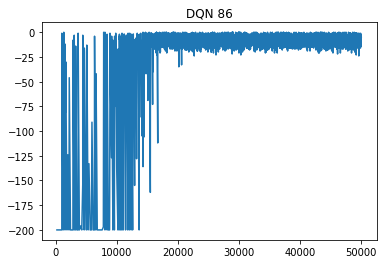

2020-05-02 16:40:22,451 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:40:29,294 - root - INFO: steps 5000, episodic_return_test -160.50(24.98)
2020-05-02 16:40:35,184 - root - INFO: steps 10000, episodic_return_test -43.60(24.74)
2020-05-02 16:40:40,892 - root - INFO: steps 15000, episodic_return_test -6.30(1.31)
2020-05-02 16:40:46,710 - root - INFO: steps 20000, episodic_return_test -8.60(1.23)
2020-05-02 16:40:52,695 - root - INFO: steps 25000, episodic_return_test -6.20(1.11)
2020-05-02 16:40:58,356 - root - INFO: steps 30000, episodic_return_test -6.00(1.42)
2020-05-02 16:41:04,448 - root - INFO: steps 35000, episodic_return_test -6.80(1.16)
2020-05-02 16:41:10,638 - root - INFO: steps 40000, episodic_return_test -8.90(1.06)
2020-05-02 16:41:16,915 - root - INFO: steps 45000, episodic_return_test -8.60(0.99)
2020-05-02 16:41:23,231 - root - INFO: steps 50000, episodic_return_test -8.90(1.24)


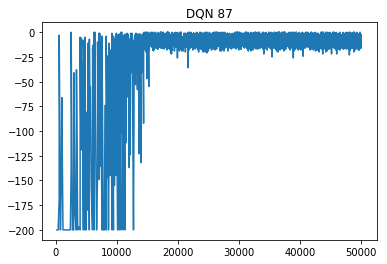

2020-05-02 16:41:24,246 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:41:31,228 - root - INFO: steps 5000, episodic_return_test -140.50(28.74)
2020-05-02 16:41:37,583 - root - INFO: steps 10000, episodic_return_test -83.40(30.12)
2020-05-02 16:41:43,272 - root - INFO: steps 15000, episodic_return_test -25.10(18.48)
2020-05-02 16:41:48,932 - root - INFO: steps 20000, episodic_return_test -4.70(1.01)
2020-05-02 16:41:54,641 - root - INFO: steps 25000, episodic_return_test -5.20(1.32)
2020-05-02 16:42:00,550 - root - INFO: steps 30000, episodic_return_test -9.50(0.85)
2020-05-02 16:42:06,332 - root - INFO: steps 35000, episodic_return_test -8.00(1.44)
2020-05-02 16:42:12,373 - root - INFO: steps 40000, episodic_return_test -7.70(1.35)
2020-05-02 16:42:18,781 - root - INFO: steps 45000, episodic_return_test -6.80(1.39)
2020-05-02 16:42:25,601 - root - INFO: steps 50000, episodic_return_test -7.10(0.81)


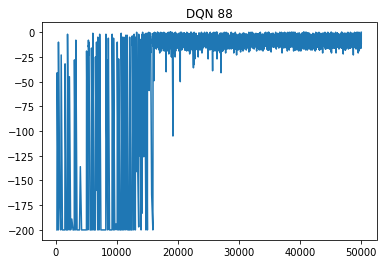

2020-05-02 16:42:26,724 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:42:33,437 - root - INFO: steps 5000, episodic_return_test -160.70(24.86)
2020-05-02 16:42:39,656 - root - INFO: steps 10000, episodic_return_test -140.60(28.70)
2020-05-02 16:42:45,265 - root - INFO: steps 15000, episodic_return_test -42.90(24.85)
2020-05-02 16:42:50,884 - root - INFO: steps 20000, episodic_return_test -28.70(18.08)
2020-05-02 16:42:56,636 - root - INFO: steps 25000, episodic_return_test -8.10(1.08)
2020-05-02 16:43:02,702 - root - INFO: steps 30000, episodic_return_test -7.90(1.47)
2020-05-02 16:43:08,889 - root - INFO: steps 35000, episodic_return_test -8.40(0.72)
2020-05-02 16:43:16,307 - root - INFO: steps 40000, episodic_return_test -5.70(1.17)
2020-05-02 16:43:23,981 - root - INFO: steps 45000, episodic_return_test -8.00(1.17)
2020-05-02 16:43:32,155 - root - INFO: steps 50000, episodic_return_test -5.30(1.48)


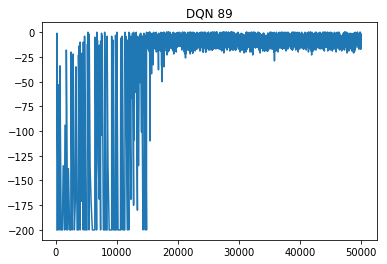

2020-05-02 16:43:33,488 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:43:49,390 - root - INFO: steps 5000, episodic_return_test -200.00(0.00)
2020-05-02 16:44:05,390 - root - INFO: steps 10000, episodic_return_test -42.60(24.90)
2020-05-02 16:44:13,931 - root - INFO: steps 15000, episodic_return_test -7.20(1.52)
2020-05-02 16:44:21,294 - root - INFO: steps 20000, episodic_return_test -8.50(0.96)
2020-05-02 16:44:28,995 - root - INFO: steps 25000, episodic_return_test -24.90(18.48)
2020-05-02 16:44:36,904 - root - INFO: steps 30000, episodic_return_test -6.70(1.50)
2020-05-02 16:44:43,807 - root - INFO: steps 35000, episodic_return_test -8.60(1.27)
2020-05-02 16:44:50,282 - root - INFO: steps 40000, episodic_return_test -9.00(1.39)
2020-05-02 16:44:56,155 - root - INFO: steps 45000, episodic_return_test -6.10(1.34)
2020-05-02 16:45:02,111 - root - INFO: steps 50000, episodic_return_test -6.80(1.00)


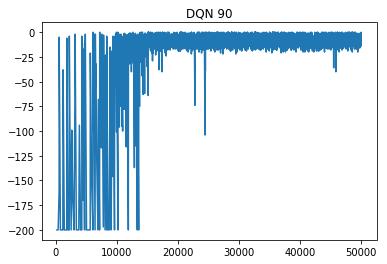

2020-05-02 16:45:03,099 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:45:09,290 - root - INFO: steps 5000, episodic_return_test -160.20(25.17)
2020-05-02 16:45:14,663 - root - INFO: steps 10000, episodic_return_test -24.80(18.47)
2020-05-02 16:45:20,131 - root - INFO: steps 15000, episodic_return_test -27.80(18.21)
2020-05-02 16:45:25,508 - root - INFO: steps 20000, episodic_return_test -5.80(0.90)
2020-05-02 16:45:30,692 - root - INFO: steps 25000, episodic_return_test -7.60(1.54)
2020-05-02 16:45:35,945 - root - INFO: steps 30000, episodic_return_test -7.80(1.38)
2020-05-02 16:45:41,340 - root - INFO: steps 35000, episodic_return_test -7.40(0.93)
2020-05-02 16:45:48,425 - root - INFO: steps 40000, episodic_return_test -5.90(1.01)
2020-05-02 16:45:56,453 - root - INFO: steps 45000, episodic_return_test -6.80(1.43)
2020-05-02 16:46:02,630 - root - INFO: steps 50000, episodic_return_test -7.90(1.30)


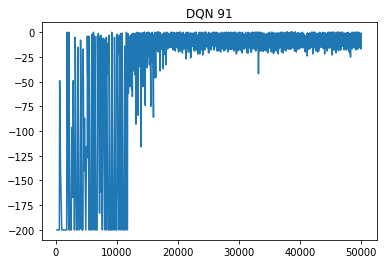

2020-05-02 16:46:03,506 - root - INFO: steps 0, episodic_return_test -162.00(24.03)
2020-05-02 16:46:09,833 - root - INFO: steps 5000, episodic_return_test -200.00(0.00)
2020-05-02 16:46:17,154 - root - INFO: steps 10000, episodic_return_test -140.70(28.65)
2020-05-02 16:46:22,938 - root - INFO: steps 15000, episodic_return_test -44.00(24.69)
2020-05-02 16:46:28,600 - root - INFO: steps 20000, episodic_return_test -6.10(1.32)
2020-05-02 16:46:34,252 - root - INFO: steps 25000, episodic_return_test -7.00(1.04)
2020-05-02 16:46:39,831 - root - INFO: steps 30000, episodic_return_test -6.70(1.62)
2020-05-02 16:46:46,163 - root - INFO: steps 35000, episodic_return_test -6.30(1.00)
2020-05-02 16:46:52,363 - root - INFO: steps 40000, episodic_return_test -7.40(1.34)
2020-05-02 16:46:58,338 - root - INFO: steps 45000, episodic_return_test -9.10(0.84)
2020-05-02 16:47:04,296 - root - INFO: steps 50000, episodic_return_test -4.70(1.17)


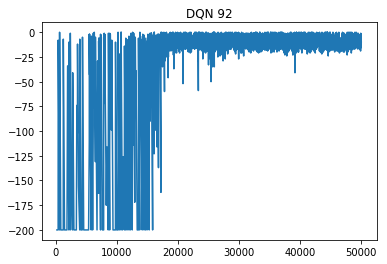

2020-05-02 16:47:05,285 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:47:11,525 - root - INFO: steps 5000, episodic_return_test -200.00(0.00)
2020-05-02 16:47:17,874 - root - INFO: steps 10000, episodic_return_test -180.70(18.31)
2020-05-02 16:47:23,588 - root - INFO: steps 15000, episodic_return_test -83.20(30.18)
2020-05-02 16:47:29,848 - root - INFO: steps 20000, episodic_return_test -45.00(24.54)
2020-05-02 16:47:36,535 - root - INFO: steps 25000, episodic_return_test -29.50(17.99)
2020-05-02 16:47:42,515 - root - INFO: steps 30000, episodic_return_test -7.90(1.09)
2020-05-02 16:47:48,150 - root - INFO: steps 35000, episodic_return_test -9.30(1.07)
2020-05-02 16:47:53,873 - root - INFO: steps 40000, episodic_return_test -8.40(1.15)
2020-05-02 16:48:01,167 - root - INFO: steps 45000, episodic_return_test -9.40(0.85)
2020-05-02 16:48:06,946 - root - INFO: steps 50000, episodic_return_test -8.60(1.27)


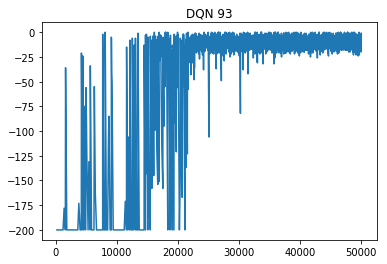

2020-05-02 16:48:07,952 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:48:14,306 - root - INFO: steps 5000, episodic_return_test -121.30(30.48)
2020-05-02 16:48:20,091 - root - INFO: steps 10000, episodic_return_test -122.60(29.98)
2020-05-02 16:48:25,776 - root - INFO: steps 15000, episodic_return_test -103.80(30.43)
2020-05-02 16:48:31,250 - root - INFO: steps 20000, episodic_return_test -11.50(1.46)
2020-05-02 16:48:36,552 - root - INFO: steps 25000, episodic_return_test -9.00(1.69)
2020-05-02 16:48:42,069 - root - INFO: steps 30000, episodic_return_test -9.40(1.19)
2020-05-02 16:48:49,761 - root - INFO: steps 35000, episodic_return_test -10.90(0.79)
2020-05-02 16:49:07,342 - root - INFO: steps 40000, episodic_return_test -9.50(1.53)
2020-05-02 16:49:19,201 - root - INFO: steps 45000, episodic_return_test -7.00(1.59)
2020-05-02 16:49:29,861 - root - INFO: steps 50000, episodic_return_test -12.50(0.91)


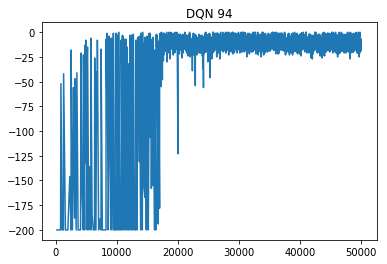

2020-05-02 16:49:32,124 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:49:43,136 - root - INFO: steps 5000, episodic_return_test -180.20(18.78)
2020-05-02 16:49:56,161 - root - INFO: steps 10000, episodic_return_test -81.50(30.60)
2020-05-02 16:50:05,527 - root - INFO: steps 15000, episodic_return_test -161.40(24.41)
2020-05-02 16:50:13,317 - root - INFO: steps 20000, episodic_return_test -32.00(17.84)
2020-05-02 16:50:19,675 - root - INFO: steps 25000, episodic_return_test -9.30(1.35)
2020-05-02 16:50:25,877 - root - INFO: steps 30000, episodic_return_test -27.50(18.21)
2020-05-02 16:50:32,283 - root - INFO: steps 35000, episodic_return_test -10.70(0.99)
2020-05-02 16:50:38,260 - root - INFO: steps 40000, episodic_return_test -10.70(1.76)
2020-05-02 16:50:43,839 - root - INFO: steps 45000, episodic_return_test -7.50(1.50)
2020-05-02 16:50:49,674 - root - INFO: steps 50000, episodic_return_test -10.90(1.93)


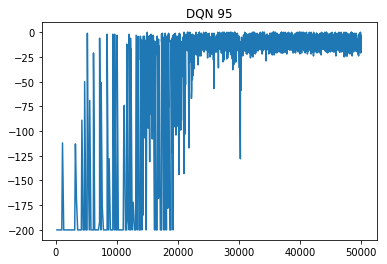

2020-05-02 16:50:50,676 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:50:58,621 - root - INFO: steps 5000, episodic_return_test -160.80(24.79)
2020-05-02 16:51:05,146 - root - INFO: steps 10000, episodic_return_test -64.20(28.12)
2020-05-02 16:51:13,836 - root - INFO: steps 15000, episodic_return_test -102.80(30.75)
2020-05-02 16:51:20,201 - root - INFO: steps 20000, episodic_return_test -86.30(29.37)
2020-05-02 16:51:25,856 - root - INFO: steps 25000, episodic_return_test -10.00(1.39)
2020-05-02 16:51:32,140 - root - INFO: steps 30000, episodic_return_test -7.80(1.25)
2020-05-02 16:51:40,656 - root - INFO: steps 35000, episodic_return_test -7.20(1.62)
2020-05-02 16:51:46,505 - root - INFO: steps 40000, episodic_return_test -7.90(1.41)
2020-05-02 16:51:53,395 - root - INFO: steps 45000, episodic_return_test -6.90(1.29)
2020-05-02 16:52:00,414 - root - INFO: steps 50000, episodic_return_test -10.50(1.34)


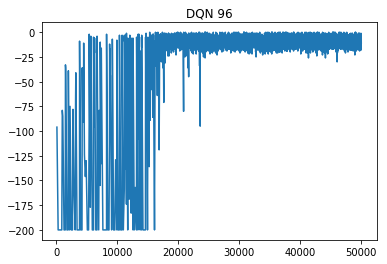

2020-05-02 16:52:01,430 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:52:07,753 - root - INFO: steps 5000, episodic_return_test -121.30(30.48)
2020-05-02 16:52:14,058 - root - INFO: steps 10000, episodic_return_test -122.70(29.94)
2020-05-02 16:52:23,302 - root - INFO: steps 15000, episodic_return_test -81.60(30.57)
2020-05-02 16:52:31,857 - root - INFO: steps 20000, episodic_return_test -45.30(24.48)
2020-05-02 16:52:37,751 - root - INFO: steps 25000, episodic_return_test -8.70(1.19)
2020-05-02 16:52:43,679 - root - INFO: steps 30000, episodic_return_test -7.00(1.56)
2020-05-02 16:52:49,837 - root - INFO: steps 35000, episodic_return_test -7.60(1.34)
2020-05-02 16:52:56,383 - root - INFO: steps 40000, episodic_return_test -9.60(1.63)
2020-05-02 16:53:03,137 - root - INFO: steps 45000, episodic_return_test -8.70(1.57)
2020-05-02 16:53:09,608 - root - INFO: steps 50000, episodic_return_test -6.10(0.90)


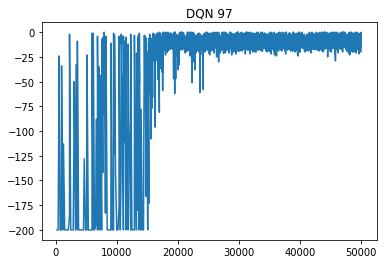

2020-05-02 16:53:10,644 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:53:18,110 - root - INFO: steps 5000, episodic_return_test -160.70(24.86)
2020-05-02 16:53:24,554 - root - INFO: steps 10000, episodic_return_test -140.90(28.55)
2020-05-02 16:53:31,173 - root - INFO: steps 15000, episodic_return_test -83.50(30.09)
2020-05-02 16:53:37,500 - root - INFO: steps 20000, episodic_return_test -9.30(1.23)
2020-05-02 16:53:43,725 - root - INFO: steps 25000, episodic_return_test -9.10(1.40)
2020-05-02 16:53:49,670 - root - INFO: steps 30000, episodic_return_test -8.30(1.43)
2020-05-02 16:53:57,637 - root - INFO: steps 35000, episodic_return_test -9.20(1.21)
2020-05-02 16:54:04,615 - root - INFO: steps 40000, episodic_return_test -7.40(1.10)
2020-05-02 16:54:10,956 - root - INFO: steps 45000, episodic_return_test -8.80(1.43)
2020-05-02 16:54:16,859 - root - INFO: steps 50000, episodic_return_test -11.90(0.73)


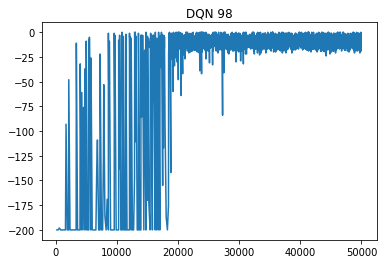

2020-05-02 16:54:17,812 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:54:26,711 - root - INFO: steps 5000, episodic_return_test -200.00(0.00)
2020-05-02 16:54:34,680 - root - INFO: steps 10000, episodic_return_test -121.50(30.40)
2020-05-02 16:54:41,727 - root - INFO: steps 15000, episodic_return_test -64.60(28.04)
2020-05-02 16:54:50,324 - root - INFO: steps 20000, episodic_return_test -180.10(18.88)
2020-05-02 16:54:57,076 - root - INFO: steps 25000, episodic_return_test -26.30(18.36)
2020-05-02 16:55:03,085 - root - INFO: steps 30000, episodic_return_test -8.80(0.85)
2020-05-02 16:55:09,714 - root - INFO: steps 35000, episodic_return_test -8.50(1.54)
2020-05-02 16:55:17,057 - root - INFO: steps 40000, episodic_return_test -6.90(0.97)
2020-05-02 16:55:24,400 - root - INFO: steps 45000, episodic_return_test -6.70(1.16)
2020-05-02 16:55:31,447 - root - INFO: steps 50000, episodic_return_test -6.60(1.10)


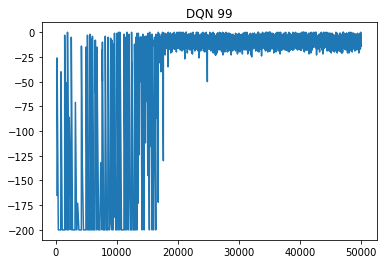

2020-05-02 16:55:32,789 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:55:47,577 - root - INFO: steps 5000, episodic_return_test -200.00(0.00)
2020-05-02 16:56:11,072 - root - INFO: steps 10000, episodic_return_test -121.40(30.44)
2020-05-02 16:56:28,585 - root - INFO: steps 15000, episodic_return_test -160.70(24.86)
2020-05-02 16:56:38,271 - root - INFO: steps 20000, episodic_return_test -8.20(1.16)
2020-05-02 16:56:47,598 - root - INFO: steps 25000, episodic_return_test -46.30(24.32)
2020-05-02 16:56:57,629 - root - INFO: steps 30000, episodic_return_test -8.40(1.53)
2020-05-02 16:57:11,380 - root - INFO: steps 35000, episodic_return_test -8.50(1.48)
2020-05-02 16:57:23,394 - root - INFO: steps 40000, episodic_return_test -7.70(1.02)
2020-05-02 16:57:31,837 - root - INFO: steps 45000, episodic_return_test -7.40(1.27)
2020-05-02 16:57:48,286 - root - INFO: steps 50000, episodic_return_test -8.20(1.30)


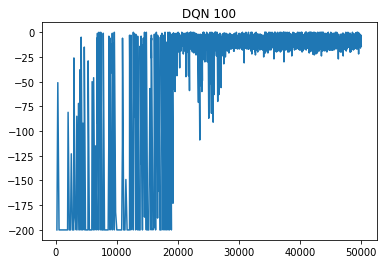

2020-05-02 16:57:52,054 - root - INFO: steps 0, episodic_return_test -180.00(18.97)
2020-05-02 16:58:14,821 - root - INFO: steps 5000, episodic_return_test -141.00(28.50)
2020-05-02 16:58:27,993 - root - INFO: steps 10000, episodic_return_test -101.60(31.12)
2020-05-02 16:58:41,474 - root - INFO: steps 15000, episodic_return_test -103.40(30.56)
2020-05-02 16:58:56,292 - root - INFO: steps 20000, episodic_return_test -63.80(28.21)
2020-05-02 16:59:05,614 - root - INFO: steps 25000, episodic_return_test -9.60(1.07)
2020-05-02 16:59:13,642 - root - INFO: steps 30000, episodic_return_test -7.10(1.20)
2020-05-02 16:59:21,399 - root - INFO: steps 35000, episodic_return_test -9.40(1.09)
2020-05-02 16:59:27,589 - root - INFO: steps 40000, episodic_return_test -9.70(1.44)
2020-05-02 16:59:33,919 - root - INFO: steps 45000, episodic_return_test -7.50(1.34)
2020-05-02 16:59:40,137 - root - INFO: steps 50000, episodic_return_test -8.60(1.48)


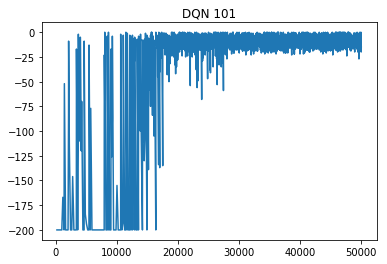

2020-05-02 16:59:41,109 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 16:59:47,726 - root - INFO: steps 5000, episodic_return_test -160.20(25.17)
2020-05-02 16:59:53,824 - root - INFO: steps 10000, episodic_return_test -141.40(28.31)
2020-05-02 16:59:59,463 - root - INFO: steps 15000, episodic_return_test -66.00(27.75)
2020-05-02 17:00:06,344 - root - INFO: steps 20000, episodic_return_test -25.90(18.40)
2020-05-02 17:00:11,862 - root - INFO: steps 25000, episodic_return_test -8.40(1.36)
2020-05-02 17:00:17,300 - root - INFO: steps 30000, episodic_return_test -8.60(1.81)
2020-05-02 17:00:22,996 - root - INFO: steps 35000, episodic_return_test -8.90(1.47)
2020-05-02 17:00:29,221 - root - INFO: steps 40000, episodic_return_test -8.60(0.96)
2020-05-02 17:00:35,109 - root - INFO: steps 45000, episodic_return_test -9.10(1.62)
2020-05-02 17:00:40,947 - root - INFO: steps 50000, episodic_return_test -8.50(1.07)


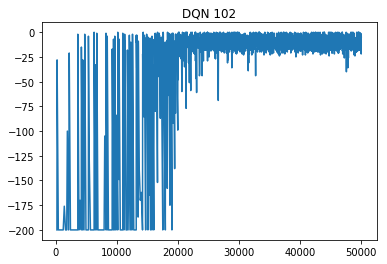

2020-05-02 17:00:41,950 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-05-02 17:00:48,715 - root - INFO: steps 5000, episodic_return_test -180.60(18.40)
2020-05-02 17:00:54,851 - root - INFO: steps 10000, episodic_return_test -103.00(30.69)
2020-05-02 17:01:00,430 - root - INFO: steps 15000, episodic_return_test -46.30(24.31)
2020-05-02 17:01:05,991 - root - INFO: steps 20000, episodic_return_test -12.70(0.47)
2020-05-02 17:01:11,410 - root - INFO: steps 25000, episodic_return_test -11.00(1.62)
2020-05-02 17:01:16,845 - root - INFO: steps 30000, episodic_return_test -9.90(1.07)
2020-05-02 17:01:22,417 - root - INFO: steps 35000, episodic_return_test -9.40(1.04)
2020-05-02 17:01:28,086 - root - INFO: steps 40000, episodic_return_test -10.10(1.06)
2020-05-02 17:01:33,896 - root - INFO: steps 45000, episodic_return_test -8.20(1.38)
2020-05-02 17:01:39,696 - root - INFO: steps 50000, episodic_return_test -47.00(24.22)


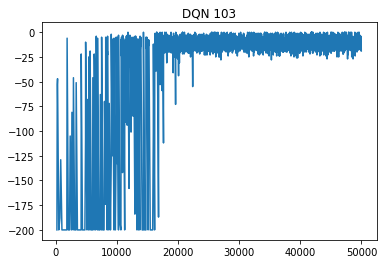

In [3]:
for i in tqdm(range(62,104)):
    dqn = dqn_feature(game='FourRooms-Goal-'+str(i))
    torch.save(dqn.network.state_dict(), 'storage/DQN-FourRooms-Goal-'+str(i)+'.weights')
    plt.plot(np.array(dqn.returns)[:,0],np.array(dqn.returns)[:,1])
    plt.title('DQN '+str(i))
    plt.show()
